In [ ]:
import numpy as np
import os
from PIL import Image

# Define the Gabor filter function:

def gabor_filter(x, y, lambda_, beta, theta, psi, gamma):
    '''
    This function makes a gabor_filter according to the values specified above.

    x and y are both "meshgrids". Basically you take two 1d arrays here representing locations on a 1d axis, and then use the np.meshgrid function to create two 2D arrays. 
    The 2 2D arrays represent every possible combination of the two arrays, thereby creating the set of 2D coordinates. This means that you can perform matrix calculations on the two arrays.
    '''
    # Here x_prime and y_prime are calculated at each point
    x_prime = x * np.cos(theta) + y * np.sin(theta)
    y_prime = -x * np.sin(theta) + y * np.cos(theta)
    
    # Here sigma is calculated
    sigma = (lambda_ * (2**beta + 1)) / (np.pi * (2**beta - 1))

    # Here the exponential and cosine component are calculated
    exp_component = np.exp(-(x_prime**2 + gamma**2 * y_prime**2) / (2 * sigma**2))
    cos_component = np.cos(2 * np.pi * x_prime / lambda_ + psi)
    
    # Finally, the correct gabor filter is returned after the two components are added together
    return exp_component * cos_component


def trim_filter(filter_array, threshold=0.05):
    mask = np.abs(filter_array) > threshold * np.max(np.abs(filter_array))
    if mask.any():
        coords = np.argwhere(mask)
        x_min, y_min = coords.min(axis=0)
        x_max, y_max = coords.max(axis=0) + 1
        return filter_array[x_min:x_max, y_min:y_max]
    return filter_array

# Function to save a Gabor filter as an image
def save_filter_as_image(filter_array, directory, size, lambda_, beta, theta, psi, gamma):
    trimmed_filter = trim_filter(filter_array)
    filename = f"gabor{size}_l{lambda_}_b{beta}_t{theta:.2f}_p{psi:.2f}_g{gamma}.png"
    filepath = os.path.join(directory, filename)
    normalized_filter = 255 * (trimmed_filter - np.min(trimmed_filter)) / (np.max(trimmed_filter) - np.min(trimmed_filter))
    image = Image.fromarray(normalized_filter.astype(np.uint8))
    image.save(filepath)
    print(f"Saved {filepath}")

# Function to save a Gabor filter as a NumPy binary file
def save_filter_as_numpy(filter_array, directory, size, lambda_, beta, theta, psi, gamma):
    trimmed_filter = trim_filter(filter_array)
    filename = f"gabor{size}_l{lambda_}_b{beta}_t{theta:.2f}_p{psi:.2f}_g{gamma}.npy"
    filepath = os.path.join(directory, filename)
    np.save(filepath, trimmed_filter)
    print(f"Saved {filepath}")

# Generate and save Gabor filters with specified parameters
def generate_and_save_filters(size, lambdas, betas, thetas, psis, gammas, directory, save_as_image=True):
    x = np.linspace(-size // 2, size // 2 - 1, size)
    y = np.linspace(-size // 2, size // 2 - 1, size)
    x, y = np.meshgrid(x, y)
    for lambda_ in lambdas:
        for beta in betas:
            for theta in thetas:
                for psi in psis:
                    for gamma in gammas:
                        filter_array = gabor_filter(x, y, lambda_, beta, theta, psi, gamma)
                        if save_as_image:
                            save_filter_as_image(filter_array, directory, size, lambda_, beta, theta, psi, gamma)
                        else:
                            save_filter_as_numpy(filter_array, directory, size, lambda_, beta, theta, psi, gamma)


directory_path = 'data/gabor_filters/eguchi_thesis'
os.makedirs(directory_path, exist_ok=True)
lambdas = [2, 4, 8, 16]  # Wavelengths
betas = [1.5]  # Scaling factor for bandwidth
thetas = [0, np.pi/4, np.pi/2, 3*np.pi/4]  # Orientations
psis = [0, np.pi]  # Phase offsets
gammas = [0.5]  # Aspect ratio
generate_and_save_filters(128, lambdas, betas, thetas, psis, gammas, directory_path, save_as_image=True)
generate_and_save_filters(128, lambdas, betas, thetas, psis, gammas, directory_path, save_as_image=False)


Saved data/gabor_filters/eguchi_thesis/gabor128_l2_b1.5_t0.00_p0.00_g0.5.png
Saved data/gabor_filters/eguchi_thesis/gabor128_l2_b1.5_t0.00_p3.14_g0.5.png
Saved data/gabor_filters/eguchi_thesis/gabor128_l2_b1.5_t0.79_p0.00_g0.5.png
Saved data/gabor_filters/eguchi_thesis/gabor128_l2_b1.5_t0.79_p3.14_g0.5.png
Saved data/gabor_filters/eguchi_thesis/gabor128_l2_b1.5_t1.57_p0.00_g0.5.png
Saved data/gabor_filters/eguchi_thesis/gabor128_l2_b1.5_t1.57_p3.14_g0.5.png
Saved data/gabor_filters/eguchi_thesis/gabor128_l2_b1.5_t2.36_p0.00_g0.5.png
Saved data/gabor_filters/eguchi_thesis/gabor128_l2_b1.5_t2.36_p3.14_g0.5.png
Saved data/gabor_filters/eguchi_thesis/gabor128_l4_b1.5_t0.00_p0.00_g0.5.png
Saved data/gabor_filters/eguchi_thesis/gabor128_l4_b1.5_t0.00_p3.14_g0.5.png
Saved data/gabor_filters/eguchi_thesis/gabor128_l4_b1.5_t0.79_p0.00_g0.5.png
Saved data/gabor_filters/eguchi_thesis/gabor128_l4_b1.5_t0.79_p3.14_g0.5.png
Saved data/gabor_filters/eguchi_thesis/gabor128_l4_b1.5_t1.57_p0.00_g0.5.png

In [ ]:
import numpy as np
import os
from PIL import Image

class GaborFilter:
    def __init__(self, size, lambda_, beta, theta, psi, gamma):
        self.size = size
        self.lambda_ = lambda_
        self.beta = beta
        self.theta = theta
        self.psi = psi
        self.gamma = gamma
        self.x, self.y = self._generate_meshgrid(size)
        self.filter = self.generate_filter()

    def _generate_meshgrid(self, size):
        """
        Generate meshgrid for Gabor filter based on the size.
        """
        x = np.linspace(-size // 2, size // 2 - 1, size)
        y = np.linspace(-size // 2, size // 2 - 1, size)
        return np.meshgrid(x, y)

    def generate_filter(self):
        """
        Generate a Gabor filter based on the object's parameters.
        """
        x_prime = self.x * np.cos(self.theta) + self.y * np.sin(self.theta)
        y_prime = -self.x * np.sin(self.theta) + self.y * np.cos(self.theta)
        
        sigma = (self.lambda_ * (2**self.beta + 1)) / (np.pi * (2**self.beta - 1))
        exp_component = np.exp(-(x_prime**2 + self.gamma**2 * y_prime**2) / (2 * sigma**2))
        cos_component = np.cos(2 * np.pi * x_prime / self.lambda_ + self.psi)
        
        return exp_component * cos_component

    def trim_filter(self, filter_array, threshold=0.05):
        """
        Trim the Gabor filter to remove insignificant values based on a threshold.
        """
        mask = np.abs(filter_array) > threshold * np.max(np.abs(filter_array))
        if mask.any():
            coords = np.argwhere(mask)
            x_min, y_min = coords.min(axis=0)
            x_max, y_max = coords.max(axis=0) + 1
            return filter_array[x_min:x_max, y_min:y_max]
        return filter_array

class GaborFilters:
    def __init__(self,size, size, lambdas, betas, thetas, psis, gammas)
        
class FilterSaver:
    def __init__(self, directory):
        self.directory = directory
        os.makedirs(directory, exist_ok=True)

    def save_as_image(self, filter_array, size, lambda_, beta, theta, psi, gamma):
        """
        Save the Gabor filter as a PNG image.
        """
        trimmed_filter = GaborFilter(size, lambda_, beta, theta, psi, gamma).trim_filter(filter_array)
        filename = f"gabor{size}_l{lambda_}_b{beta}_t{theta:.2f}_p{psi:.2f}_g{gamma}.png"
        filepath = os.path.join(self.directory, filename)

        normalized_filter = 255 * (trimmed_filter - np.min(trimmed_filter)) / (np.max(trimmed_filter) - np.min(trimmed_filter))
        image = Image.fromarray(normalized_filter.astype(np.uint8))
        image.save(filepath)
        print(f"Saved image to {filepath}")

    def save_as_numpy(self, filter_array, size, lambda_, beta, theta, psi, gamma):
        """
        Save the Gabor filter as a NumPy binary file.
        """
        trimmed_filter = GaborFilter(size, lambda_, beta, theta, psi, gamma).trim_filter(filter_array)
        filename = f"gabor{size}_l{lambda_}_b{beta}_t{theta:.2f}_p{psi:.2f}_g{gamma}.npy"
        filepath = os.path.join(self.directory, filename)
        np.save(filepath, trimmed_filter)
        print(f"Saved NumPy array to {filepath}")



# Parameters for generating Gabor filters
directory_path = 'data/gabor_filters/eguchi_thesis'
lambdas = [2, 4, 8, 16]  # Wavelengths
betas = [1.5]  # Scaling factor for bandwidth
thetas = [0, np.pi/4, np.pi/2, 3*np.pi/4]  # Orientations
psis = [0, np.pi]  # Phase offsets
gammas = [0.5]  # Aspect ratio

# Generate and save filters as images and numpy arrays
generate_and_save_filters(128, lambdas, betas, thetas, psis, gammas, directory_path, save_as_image=True)
generate_and_save_filters(128, lambdas, betas, thetas, psis, gammas, directory_path, save_as_image=False)

In [ ]:
import numpy as np
import os
from PIL import Image
from scipy.ndimage import convolve
from scipy.signal import fftconvolve
import matplotlib.pyplot as plt

# Function to load an image
def load_image(image_path):
    image = Image.open(image_path).convert('L')  # Convert to grayscale
    return np.array(image) / 255.0  # Normalize the image to 0-1 scale

# Function to load Gabor filters from a directory
def load_gabor_filters(directory):
    filters = []
    filenames = [f for f in os.listdir(directory) if f.endswith('.npy')]
    for filename in filenames:
        filter_path = os.path.join(directory, filename)
        gabor_filter = np.load(filter_path)
        filters.append(gabor_filter)
    return filters

# Function to apply Gabor filters to an image
def apply_gabor_filters(image, filters):
    filtered_images = []
    for gabor_filter in filters:
        filtered_image = fftconvolve(image, gabor_filter, mode='same')
        filtered_images.append(filtered_image)
        print("done")
    return filtered_images

# Load the test image
test_image_path = 'test.png'
test_image = load_image(test_image_path)

# Load the Gabor filters
filters_directory = 'data/gabor_filters/eguchi_thesis'
gabor_filters = load_gabor_filters(filters_directory)

# Apply the filters to the test image
filtered_images = apply_gabor_filters(test_image, gabor_filters)



done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done


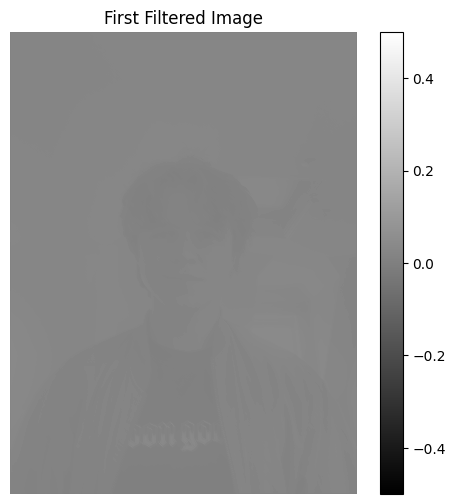

In [ ]:
if filtered_images:
    plt.figure(figsize=(6, 6))  # Adjust size as needed
    plt.imshow(filtered_images[30], cmap='gray', vmin=-0.5,vmax=0.5)
    plt.colorbar()  # Optional, shows the intensity scale
    plt.title('First Filtered Image')
    plt.axis('off')  # Hide axes for better visualization
    plt.show()
else:
    print("No filtered images to display.")